
# El Algoritmo del Perceptrón y su Relación con el Entrenamiento

En esta sección se presenta el perceptrón como el modelo lineal más básico, junto con su regla de actualización inspirada en el gradiente para ajustar pesos y sesgo. Además, se introducen los conceptos de gradiente descendente, su regla de actualización y algunas variantes empleadas en la optimización de modelos de aprendizaje.



## El Perceptrón: Modelo Lineal Básico y Regla de Actualización

El perceptrón es el modelo lineal más básico utilizado para la clasificación. Su salida se calcula mediante la combinación lineal de las entradas:

$$
z = \sum_{i=1}^{n} w_i \, x_i + b,
$$

y se determina la salida a partir de una función escalón:

$$
\hat{y} =
\begin{cases}
1, & \text{si } z \geq 0, \\
0, & \text{si } z < 0.
\end{cases}
$$

Para ajustar los pesos $w_i$ y el sesgo $b$, se emplea una regla de actualización que se aplica de la siguiente forma para cada muestra:
 
$$
w_i \leftarrow w_i + \eta \, (y - \hat{y}) \, x_i,
$$

$$
b \leftarrow b + \eta \, (y - \hat{y}),
$$

donde:
- $\eta$ es la tasa de aprendizaje,
- $y$ es la etiqueta real,
- $\hat{y}$ es la salida predicha.

Esta regla de actualización es similar al mecanismo del gradiente descendente, ya que se ajustan los parámetros en función del error cometido.



## Gradiente Descendente: Fundamentos y Conceptos

El gradiente descendente es un algoritmo de optimización que se utiliza para minimizar una función de pérdida $J(\theta)$, donde $\theta$ representa los parámetros del modelo. El método consiste en actualizar iterativamente los parámetros en la dirección opuesta al gradiente de la función de pérdida. La regla de actualización se expresa como:

$$
\theta \leftarrow \theta - \eta \, \nabla_\theta J(\theta),
$$

donde:
- $\theta$ puede representar un peso o un sesgo,
- $\eta$ es la tasa de aprendizaje,
- $\nabla_\theta J(\theta)$ es el gradiente de la función de pérdida con respecto a $\theta$.

Este método permite que el modelo se acerque gradualmente al mínimo de la función de pérdida.



## Ejemplo Sencillo: Minimización de $J(w) = w^2$

Consideremos la función de pérdida

$$
J(w) = w^2.
$$

El gradiente de $J(w)$ con respecto a $w$ es:

$$
\frac{dJ}{dw} = 2w.
$$

La regla de actualización del gradiente descendente para minimizar $J(w)$ es:

$$
w \leftarrow w - \eta \cdot 2w.
$$

A continuación se muestra un ejemplo en Python que ilustra cómo se utiliza el gradiente descendente para minimizar esta función.


In [ ]:
# Ejemplo en Python: Minimización de J(w) = w^2
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función de pérdida J(w) = w^2
def J(w):
    return w**2

# Derivada de J(w)
def grad_J(w):
    return 2 * w

# Parámetros iniciales
w = 10.0           # Valor inicial de w
eta = 0.1          # Tasa de aprendizaje
epochs = 20        # Número de iteraciones

w_history = []
loss_history = []

# Aplicar la regla de actualización del gradiente descendente
for epoch in range(epochs):
    grad = grad_J(w)
    w = w - eta * grad
    w_history.append(w)
    loss_history.append(J(w))
    print(f"Época {epoch+1:2d}: w = {w:.4f}, J(w) = {J(w):.4f}")

# Visualizar la evolución de J(w)
plt.figure(figsize=(8, 4))
plt.plot(range(1, epochs+1), loss_history, marker='o')
plt.title("Evolución de J(w) durante el entrenamiento")
plt.xlabel("Época")
plt.ylabel("J(w)")
plt.grid(True)
plt.show()



## Variantes del Gradiente Descendente y Optimización Avanzada

Existen diversas variantes del gradiente descendente que se adaptan a distintos escenarios:

- **Gradiente Descendente Batch:**  
  Se calcula el gradiente usando todo el conjunto de datos antes de actualizar los parámetros. Esto puede ser costoso computacionalmente para conjuntos de datos grandes.

- **Gradiente Descendente Estocástico (SGD):**  
  Se actualizan los parámetros utilizando cada muestra individualmente. Esto introduce ruido en las actualizaciones, lo que puede ayudar a escapar de óptimos locales, aunque puede hacer que la convergencia sea menos estable.

- **Gradiente Descendente Mini-Batch:**  
  Se divide el conjunto de datos en pequeños lotes (mini-batches) y se actualizan los parámetros usando el gradiente calculado en cada uno. Esta variante es la más común, ya que equilibra la estabilidad y la eficiencia computacional.

Además, se han desarrollado optimizadores avanzados que incorporan técnicas para acelerar la convergencia:
- **Momentum:**  
  Introduce un término que acumula la dirección del gradiente de iteraciones anteriores, lo que ayuda a suavizar las actualizaciones y acelerar el proceso.
- **RMSProp:**  
  Ajusta la tasa de aprendizaje de cada parámetro de forma adaptativa, basándose en el promedio de los cuadrados de los gradientes.
- **Adam (Adaptive Moment Estimation):**  
  Combina las ideas de Momentum y RMSProp para proporcionar actualizaciones eficientes y robustas. Adam es uno de los optimizadores más utilizados en el aprendizaje profundo.



## ¿Cómo Funciona el Gradiente Descendente Batch?

El gradiente descendente Batch utiliza el conjunto completo de datos para calcular la función de pérdida y su gradiente. En cada iteración, se procesan todas las muestras disponibles para obtener el gradiente promedio, el cual se utiliza para actualizar los parámetros del modelo.



### Cálculo de la Función de Pérdida Global

Para un conjunto de datos con $m$ muestras, si se utiliza el error cuadrático medio (MSE) en un problema de regresión, la función de pérdida se define como:

$$
J(w) = \frac{1}{2m}\sum_{i=1}^{m}(h(x_i) - y_i)^2,
$$

donde:
- $h(x_i)$ es la predicción del modelo para la muestra $i$,
- $y_i$ es el valor real para la muestra $i$.



### Cálculo del Gradiente del Conjunto Completo

El gradiente del parámetro $w$ se obtiene promediando los gradientes individuales de cada muestra:

$$
\frac{\partial J(w)}{\partial w} = \frac{1}{m}\sum_{i=1}^{m} (h(x_i) - y_i)x_i.
$$

Esto significa que se toma la media de todos los gradientes calculados, asegurando que la dirección del descenso refleje la totalidad de la información disponible en el dataset.



### Actualización de los Parámetros

Una vez obtenido el gradiente promedio, los parámetros se actualizan utilizando la regla:

$$
w \leftarrow w - \eta \, \frac{\partial J(w)}{\partial w},
$$

donde $\eta$ representa la tasa de aprendizaje. Esta actualización se efectúa en cada iteración utilizando todos los datos del conjunto, lo que garantiza que la dirección del descenso sea precisa y estable.



### Ejemplo Intuitivo

Considera un conjunto de datos con 1000 muestras. Para actualizar el parámetro $w$, el algoritmo realiza lo siguiente en cada iteración:
- Calcula el error y el gradiente para cada una de las 1000 muestras.
- Promedia estos 1000 gradientes para obtener una dirección única de actualización.
- Actualiza $w$ usando este gradiente promedio.

Este enfoque asegura que cada actualización refleje la totalidad del conjunto de datos, lo que conduce a una convergencia suave y estable.



### Resumen

- **Batch Gradient Descent** utiliza el conjunto completo de datos para calcular el gradiente.
- Cada actualización se basa en el gradiente promedio, lo que ofrece una dirección de descenso precisa y estable.
- Este método es adecuado para conjuntos de datos pequeños o medianos, pero puede resultar computacionalmente costoso para datasets muy grandes.


In [ ]:
# Ejemplo en Python: Batch Gradient Descent para Regresión Lineal con múltiples muestras

import numpy as np
import matplotlib.pyplot as plt

# Definir el conjunto de datos: 5 muestras
X = np.array([1, 2, 3, 4, 5], dtype=float)
y = 2 * X  # La relación verdadera es y = 2x

def cost_batch(w, X, y):
    m = len(X)
    return 0.5 * np.mean((w * X - y) ** 2)

def grad_cost_batch(w, X, y):
    m = len(X)
    return np.mean((w * X - y) * X)

# Inicialización del parámetro
w = 0.0
eta = 0.01  # Tasa de aprendizaje
epochs = 200

w_history_batch = []
cost_history_batch = []

for epoch in range(epochs):
    # Calcula el gradiente usando el conjunto completo (Batch)
    grad = grad_cost_batch(w, X, y)
    # Actualiza el parámetro
    w = w - eta * grad
    w_history_batch.append(w)
    cost_history_batch.append(cost_batch(w, X, y))

print("Batch Gradient Descent:")
print("Valor final de w:", w)

plt.figure(figsize=(8, 4))
plt.plot(range(1, epochs+1), cost_history_batch, marker='o', markersize=3, label="Costo")
plt.title("Evolución del Costo en Batch Gradient Descent")
plt.xlabel("Época")
plt.ylabel("Costo")
plt.grid(True)
plt.legend()
plt.show()



## ¿Cómo Funciona el Gradiente Descendente Estocástico (SGD)?

El gradiente descendente estocástico (SGD) utiliza una única muestra de datos para calcular el gradiente en cada actualización. Esto implica que, en lugar de procesar todas las muestras del dataset como en el método Batch, se selecciona una muestra (o un pequeño subconjunto) en cada paso para calcular el gradiente, lo que conduce a actualizaciones más frecuentes pero también más ruidosas.



### Cálculo del Gradiente en SGD

Para una muestra $i$, el gradiente se estima como:

$$
\nabla J(w) \approx (h(x_i) - y_i)x_i,
$$

donde $h(x_i)$ es la predicción del modelo para la muestra $i$ y $y_i$ es su valor real. Cada actualización utiliza únicamente este gradiente, lo que puede provocar variabilidad en la dirección del descenso.



### Actualización de los Parámetros en SGD

Con una tasa de aprendizaje $\eta$, el parámetro $w$ se actualiza para cada muestra según:

$$
w \leftarrow w - \eta \, (h(x_i) - y_i)x_i.
$$

Debido a que se realiza una actualización por cada muestra, en cada época se efectúan $m$ actualizaciones (siendo $m$ el número de muestras), lo que permite respuestas rápidas a cambios en los datos, pero a la vez introduce mayor ruido en las actualizaciones.



### Ejemplo Intuitivo de SGD

Considérese un conjunto de datos con $m$ muestras. En cada época, el algoritmo:
- Baraja las muestras.
- Calcula el gradiente para cada muestra de forma individual.
- Actualiza los parámetros de forma inmediata usando el gradiente calculado.

Este proceso se repite durante múltiples épocas. Aunque cada actualización individual puede ser imprecisa debido a la alta varianza, el proceso global permite al modelo converger a lo largo del tiempo.


In [ ]:
# Ejemplo en Python: Stochastic Gradient Descent para Regresión Lineal con múltiples muestras

import numpy as np
import matplotlib.pyplot as plt

# Definir el conjunto de datos: 5 muestras
X = np.array([1, 2, 3, 4, 5], dtype=float)
y = 2 * X  # La relación verdadera es y = 2x

def cost_sgd(w, X, y):
    m = len(X)
    return 0.5 * np.mean((w * X - y) ** 2)

def grad_cost_sample(w, x_i, y_i):
    # Calcula el gradiente para una sola muestra
    return (w * x_i - y_i) * x_i

w = 0.0
eta = 0.01
epochs = 20  # Se usan más épocas debido al ruido en las actualizaciones

w_history_sgd = []
cost_history_sgd = []

for epoch in range(epochs):
    # Barajar los índices de las muestras en cada época
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    for i in indices:
        # Actualizar el parámetro para cada muestra individual
        grad = grad_cost_sample(w, X[i], y[i])
        w = w - eta * grad
    w_history_sgd.append(w)
    cost_history_sgd.append(cost_sgd(w, X, y))
    print(f"Epoch {epoch+1:2d}: w = {w:.4f}, Cost = {cost_history_sgd[-1]:.4f}")

print("Stochastic Gradient Descent:")
print("Valor final de w:", w)

plt.figure(figsize=(8, 4))
plt.plot(range(1, epochs+1), cost_history_sgd, marker='o', markersize=5, label="Costo")
plt.title("Evolución del Costo en Stochastic Gradient Descent")
plt.xlabel("Época")
plt.ylabel("Costo")
plt.grid(True)
plt.legend()
plt.show()



::: tip Comparación entre Batch y Stochastic Gradient Descent
- **Batch Gradient Descent:** Calcula el gradiente utilizando todas las muestras, lo que resulta en una actualización por época basada en el gradiente promedio. Esto proporciona actualizaciones precisas y estables, pero puede ser computacionalmente costoso para grandes conjuntos de datos.
- **Stochastic Gradient Descent (SGD):** Actualiza los parámetros utilizando una sola muestra a la vez, lo que produce actualizaciones más frecuentes y puede ayudar a escapar de óptimos locales, aunque introduce mayor ruido en la dirección del descenso.
:::



## ¿Cómo Funciona el Gradiente Descendente Mini-Batch?

El gradiente descendente mini-batch combina aspectos del método Batch y del Stochastic Gradient Descent (SGD). En este enfoque, se divide el conjunto de datos completo en pequeños grupos llamados *mini-batches*. Para cada mini-batch se calcula el gradiente promedio, y luego se actualizan los parámetros del modelo. De este modo se logra un equilibrio entre la estabilidad de las actualizaciones basadas en todo el conjunto y la rapidez de las actualizaciones basadas en muestras individuales.



### Cálculo del Gradiente en Mini-Batch

Para un mini-batch que contiene $B$ muestras, la función de pérdida se calcula como:

$$
J_B(w) = \frac{1}{2B}\sum_{i \in \text{batch}}(h(x_i) - y_i)^2,
$$

y el gradiente se estima promediando sobre las muestras del mini-batch:

$$
\frac{\partial J_B(w)}{\partial w} = \frac{1}{B}\sum_{i \in \text{batch}}(h(x_i) - y_i)x_i.
$$

Esta estimación se utiliza para actualizar los parámetros con la tasa de aprendizaje $\eta$:

$$
w \leftarrow w - \eta \, \frac{\partial J_B(w)}{\partial w}.
$$



### Ejemplo Intuitivo de Mini-Batch Gradient Descent

Considere un conjunto de datos de $m$ muestras. En cada iteración, el dataset se divide en mini-batches de tamaño $B$. Para cada mini-batch, se calcula el gradiente promedio y se actualizan los parámetros. Este enfoque permite obtener actualizaciones más frecuentes que el método Batch y reduce la variabilidad en comparación con el SGD, logrando así un balance entre precisión y velocidad.


In [ ]:
# Ejemplo en Python: Mini-Batch Gradient Descent para Regresión Lineal

import numpy as np
import matplotlib.pyplot as plt

# Definir el conjunto de datos: 10 muestras
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=float)
y = 2 * X  # La relación verdadera es y = 2x

def cost_minibatch(w, X, y):
    B = len(X)
    return 0.5 * np.mean((w * X - y) ** 2)

def grad_cost_minibatch(w, X_batch, y_batch):
    return np.mean((w * X_batch - y_batch) * X_batch)

# Inicialización del parámetro
w = 0.0
eta = 0.01      # Tasa de aprendizaje
epochs = 200
batch_size = 3  # Tamaño del mini-batch

w_history_minibatch = []
cost_history_minibatch = []

m = len(X)
for epoch in range(epochs):
    # Barajar los índices de las muestras
    indices = np.arange(m)
    np.random.shuffle(indices)
    # Procesar el dataset en mini-batches
    for start in range(0, m, batch_size):
        end = start + batch_size
        batch_indices = indices[start:end]
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        grad = grad_cost_minibatch(w, X_batch, y_batch)
        w = w - eta * grad
    w_history_minibatch.append(w)
    cost_history_minibatch.append(cost_minibatch(w, X, y))

print("Mini-Batch Gradient Descent:")
print("Valor final de w:", w)

plt.figure(figsize=(8, 4))
plt.plot(range(1, epochs+1), cost_history_minibatch, marker='o', markersize=3, label="Costo")
plt.title("Evolución del Costo en Mini-Batch Gradient Descent")
plt.xlabel("Época")
plt.ylabel("Costo")
plt.grid(True)
plt.legend()
plt.show()



::: tip Comparación: Mini-Batch vs. Batch vs. SGD
- **Batch Gradient Descent:** Calcula el gradiente utilizando el conjunto completo de datos, lo que produce actualizaciones precisas y estables, pero con una sola actualización por época.
- **Stochastic Gradient Descent (SGD):** Actualiza los parámetros utilizando una sola muestra, lo que genera actualizaciones muy frecuentes pero con alta variabilidad en la dirección del gradiente.
- **Mini-Batch Gradient Descent:** Divide el conjunto de datos en mini-batches, ofreciendo un compromiso entre estabilidad y frecuencia de actualizaciones. Es el método más utilizado en la práctica, ya que combina la precisión de Batch y la rapidez de SGD.
:::



## Optimizers en Redes Neuronales

Los optimizadores son algoritmos que se utilizan para ajustar los parámetros (por ejemplo, pesos y sesgos) de un modelo, con el fin de minimizar una función de pérdida. Durante el entrenamiento de una red neuronal, se busca encontrar el conjunto de parámetros que reduzca al mínimo el error entre las predicciones del modelo y los valores reales. Estos algoritmos se basan en métodos de gradiente descendente y sus variantes, y juegan un papel crucial en la eficiencia y efectividad del entrenamiento.



### ¿Qué Hacen los Optimizers?

Los optimizadores realizan las siguientes tareas:
- **Calcular el Gradiente:** Evalúan la derivada de la función de pérdida respecto a cada parámetro del modelo.
- **Actualizar Parámetros:** Modifican los parámetros en la dirección opuesta al gradiente para reducir el error.
- **Gestionar la Tasa de Aprendizaje:** Ajustan la magnitud de las actualizaciones, ya sea mediante una tasa fija o de forma adaptativa.



### Tipos Comunes de Optimizadores

A continuación se describen algunos de los optimizadores más utilizados en el entrenamiento de redes neuronales:

- **SGD (Stochastic Gradient Descent):**
  - Actualiza los parámetros utilizando una muestra a la vez.
  - Es simple y requiere poca memoria, pero puede presentar actualizaciones ruidosas y converger lentamente.

- **Momentum:**
  - Incorpora un término que acumula el gradiente de iteraciones previas para suavizar y acelerar la convergencia.
  - Ayuda a superar oscilaciones en el proceso de actualización.

- **RMSProp:**
  - Ajusta la tasa de aprendizaje de cada parámetro de forma individual, basándose en el promedio de los cuadrados de los gradientes.
  - Es efectivo para tratar problemas con gradientes de diferente escala.

- **Adam (Adaptive Moment Estimation):**
  - Combina las ideas de Momentum y RMSProp para ofrecer actualizaciones robustas y eficientes.
  - Es uno de los optimizadores más populares en el aprendizaje profundo debido a su capacidad para adaptarse a distintos escenarios.



### Ventajas y Desventajas de los Optimizadores

Cada optimizador tiene sus propias características:

- **SGD:**
  - *Ventajas:* Simple de implementar, bajo consumo de memoria.
  - *Desventajas:* Convergencia lenta y alta variabilidad en las actualizaciones.

- **Momentum:**
  - *Ventajas:* Acelera la convergencia y reduce las oscilaciones.
  - *Desventajas:* Requiere un ajuste cuidadoso del hiperparámetro de momentum.

- **RMSProp:**
  - *Ventajas:* Gestiona eficazmente tasas de aprendizaje variables para cada parámetro.
  - *Desventajas:* Involucra hiperparámetros adicionales que deben ajustarse para cada problema.

- **Adam:**
  - *Ventajas:* Combina las ventajas de Momentum y RMSProp, resultando robusto y eficiente en muchos escenarios.
  - *Desventajas:* Puede ser sensible a la elección de la tasa de aprendizaje y otros hiperparámetros.



::: tip Consejo
Los optimizadores son esenciales en el entrenamiento de redes neuronales. Permiten ajustar los parámetros del modelo de forma automatizada y eficiente. Se recomienda experimentar con distintos optimizadores y ajustar sus hiperparámetros para encontrar la configuración óptima para cada problema. La elección del optimizador puede influir significativamente en la velocidad de convergencia y en la calidad final del modelo.
:::



## Momentum

Momentum es una técnica de optimización que acelera el gradiente descendente en la dirección de descenso relevante y reduce las oscilaciones. Esto se logra incorporando el concepto de "velocidad", que es el promedio móvil exponencial de los gradientes pasados. En lugar de actualizar los parámetros únicamente con el gradiente actual, se acumula una porción del gradiente de iteraciones anteriores.

La regla de actualización con Momentum se expresa de la siguiente manera:

$$
v_t = \beta \, v_{t-1} + (1 - \beta) \, \nabla_\theta J(\theta),
$$

$$
\theta \leftarrow \theta - \eta \, v_t,
$$

donde:
- $\theta$ representa los parámetros del modelo.
- $\eta$ es la tasa de aprendizaje.
- $v_t$ es la "velocidad" o acumulación del gradiente en el instante $t$.
- $\beta$ es el hiperparámetro de momentum, cuyo valor típicamente se encuentra entre 0.9 y 0.99.
- $\nabla_\theta J(\theta)$ es el gradiente de la función de pérdida respecto a los parámetros.

Esta formulación permite que, cuando los gradientes tienen una dirección consistente a lo largo de varias iteraciones, la "velocidad" $v_t$ se incremente y se acelere la convergencia. Al mismo tiempo, ayuda a suavizar las actualizaciones en zonas donde el gradiente es ruidoso o varía mucho.



### Ventajas y Desventajas de Momentum

**Ventajas:**
- **Aceleración:** Al acumular gradientes pasados, Momentum acelera la convergencia en direcciones consistentes.
- **Reducción de Oscilaciones:** Ayuda a reducir las oscilaciones en regiones con gradientes ruidosos, lo que conduce a actualizaciones más estables.

**Desventajas:**
- **Hiperparámetro Adicional:** Requiere ajustar el valor de $\beta$, lo que puede añadir complejidad al proceso de tuning.
- **Posible Exceso de Inercia:** Si $\beta$ es demasiado alto, el modelo puede "sobreacelerarse" y pasar por alto el mínimo de la función de pérdida.



::: tip Consejo
El uso de Momentum resulta especialmente beneficioso cuando el gradiente descendente tradicional presenta oscilaciones o converge de forma lenta. Se recomienda experimentar con valores de $\beta$ en el rango de 0.9 a 0.99 para encontrar la configuración óptima que acelere la convergencia sin inducir inestabilidad.
:::


In [ ]:
# Ejemplo en Python: Minimización de J(w) = w^2 utilizando Momentum

import numpy as np
import matplotlib.pyplot as plt

# Definir la función de pérdida J(w) = w^2
def J(w):
    return w**2

# Definir la derivada de J(w)
def grad_J(w):
    return 2 * w

# Inicialización del parámetro
w = 10.0         # Valor inicial de w
eta = 0.1        # Tasa de aprendizaje
beta = 0.9       # Hiperparámetro de momentum
epochs = 50      # Número de iteraciones

# Inicialización de la velocidad (momentum acumulado)
v = 0.0

# Listas para almacenar la evolución de w y el costo
w_history = []
loss_history = []

for epoch in range(epochs):
    # Calcular el gradiente actual
    grad = grad_J(w)
    # Actualizar el momentum: se acumula el gradiente ponderado por beta
    v = beta * v + (1 - beta) * grad
    # Actualizar el parámetro utilizando el valor acumulado en v
    w = w - eta * v
    w_history.append(w)
    loss_history.append(J(w))
    print(f"Epoch {epoch+1:2d}: w = {w:.4f}, Loss = {J(w):.4f}")

# Visualizar la evolución del costo a lo largo de las iteraciones
plt.figure(figsize=(8, 4))
plt.plot(range(1, epochs+1), loss_history, marker='o', markersize=5)
plt.title("Evolución del Costo con Momentum")
plt.xlabel("Época")
plt.ylabel("Costo J(w)")
plt.grid(True)
plt.show()



::: tip Observación sobre el Aumento de la Función de Pérdida con Momentum
Si en el ejemplo de Momentum la función de pérdida aumenta en lugar de disminuir, puede ser un indicativo de que los hiperparámetros no están bien ajustados. En particular, podrían estar sucediendo las siguientes situaciones:
- **Tasa de Aprendizaje ($\eta$) demasiado alta:**  
  Esto provoca actualizaciones demasiado agresivas, lo que puede llevar a que el parámetro $w$ sobrepase el mínimo de la función de pérdida. Como resultado, el valor de $J(w)$ puede aumentar en lugar de disminuir.
- **Valor de Momentum ($\beta$) demasiado elevado:**  
  Un valor de $\beta$ excesivamente alto puede acumular demasiada "inercia" de los gradientes pasados, haciendo que las actualizaciones sean demasiado grandes y provoquen oscilaciones o divergencia.
  
En tales casos, se recomienda experimentar reduciendo la tasa de aprendizaje y/o ajustando el valor del hiperparámetro de momentum para lograr una convergencia más estable y evitar que la función de pérdida aumente.
:::


In [ ]:
# Ejemplo en Python: Minimización de J(w) = w^2 utilizando Momentum con tasa de aprendizaje ajustada

import numpy as np
import matplotlib.pyplot as plt

# Definir la función de pérdida J(w) = w^2
def J(w):
    return w**2

# Definir la derivada de J(w)
def grad_J(w):
    return 2 * w

# Inicialización del parámetro
w = 10.0         # Valor inicial de w
eta = 0.01       # Tasa de aprendizaje ajustada (más pequeña para evitar actualizaciones demasiado agresivas)
beta = 0.9       # Hiperparámetro de momentum
epochs = 50      # Número de iteraciones

# Inicialización de la velocidad (momentum acumulado)
v = 0.0

# Listas para almacenar la evolución de w y del costo
w_history = []
loss_history = []

for epoch in range(epochs):
    # Calcular el gradiente actual
    grad = grad_J(w)
    # Actualizar el momentum: acumula el gradiente ponderado por beta
    v = beta * v + (1 - beta) * grad
    # Actualizar el parámetro utilizando el valor acumulado en v
    w = w - eta * v
    w_history.append(w)
    loss_history.append(J(w))
    print(f"Epoch {epoch+1:2d}: w = {w:.4f}, Loss = {J(w):.4f}")

# Visualizar la evolución del costo a lo largo de las iteraciones
plt.figure(figsize=(8, 4))
plt.plot(range(1, epochs+1), loss_history, marker='o', markersize=5)
plt.title("Evolución del Costo con Momentum (Tasa Ajustada)")
plt.xlabel("Época")
plt.ylabel("Costo J(w)")
plt.grid(True)
plt.show()


In [ ]:
# Ejemplo interactivo utilizando ipywidgets para Momentum

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def run_momentum(eta, beta, epochs, w_init):
    # Inicializar el parámetro y la velocidad
    w = w_init
    v = 0.0
    w_history = []
    loss_history = []
    
    # Ejecutar el algoritmo de Momentum durante 'epochs' iteraciones
    for epoch in range(epochs):
        grad = 2 * w  # Derivada de J(w) = w^2
        # Actualización del momentum: se acumula parte del gradiente pasado y el gradiente actual
        v = beta * v + (1 - beta) * grad
        # Actualización del parámetro w
        w = w - eta * v
        w_history.append(w)
        loss_history.append(w**2)
    
    # Configurar la visualización de la evolución de w y del costo
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs+1), w_history, marker='o', color='blue')
    plt.title("Evolución de w")
    plt.xlabel("Época")
    plt.ylabel("w")
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs+1), loss_history, marker='o', color='red')
    plt.title("Evolución de la Pérdida J(w)")
    plt.xlabel("Época")
    plt.ylabel("J(w)")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Crear los widgets interactivos para ajustar los hiperparámetros
interact(run_momentum,
         eta=FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001, description='Learning Rate'),
         beta=FloatSlider(value=0.9, min=0.0, max=0.99, step=0.01, description='Momentum'),
         epochs=IntSlider(value=50, min=10, max=200, step=10, description='Epochs'),
         w_init=FloatSlider(value=10.0, min=-20.0, max=20.0, step=0.5, description='w Init'))



## RMSProp

RMSProp es un optimizador que ajusta la tasa de aprendizaje de cada parámetro de forma individual mediante el cálculo de un promedio móvil de los cuadrados de los gradientes. En lugar de utilizar una tasa de aprendizaje fija para todos los parámetros, RMSProp escala la actualización en función de la magnitud reciente de los gradientes, lo que puede mejorar la estabilidad y la velocidad de convergencia en problemas con gradientes de escalas variables.

La regla de actualización de RMSProp se expresa de la siguiente manera:

$$
v_t = \gamma \, v_{t-1} + (1 - \gamma) \, \left(\nabla_\theta J(\theta)\right)^2,
$$

$$
\theta \leftarrow \theta - \frac{\eta}{\sqrt{v_t + \epsilon}} \, \nabla_\theta J(\theta),
$$

donde:
- $\theta$ representa los parámetros del modelo.
- $\eta$ es la tasa de aprendizaje.
- $v_t$ es el promedio móvil de los gradientes al cuadrado en el instante $t$.
- $\gamma$ es el factor de decaimiento (típicamente en torno a 0.9).
- $\epsilon$ es una pequeña constante que se añade para evitar la división por cero.
- $\nabla_\theta J(\theta)$ es el gradiente de la función de pérdida respecto a los parámetros.

Esta técnica normaliza las actualizaciones, reduciendo las oscilaciones y permitiendo que el optimizador se adapte a gradientes de diferentes magnitudes.



### Ventajas y Desventajas de RMSProp

**Ventajas:**
- Ajusta la tasa de aprendizaje para cada parámetro, lo que puede acelerar la convergencia en problemas donde los gradientes tienen escalas muy distintas.
- Reduce las oscilaciones en la actualización de los parámetros al normalizar los gradientes.

**Desventajas:**
- Introduce hiperparámetros adicionales ($\gamma$ y $\epsilon$) que requieren ajuste.
- Puede ser sensible a la elección de estos hiperparámetros, lo que influye en la estabilidad y la velocidad de convergencia.



::: tip Consejo sobre RMSProp
RMSProp es especialmente útil en escenarios donde los gradientes varían significativamente en magnitud. Se recomienda comenzar con un valor de $\gamma$ alrededor de 0.9 y un valor pequeño para $\epsilon$ (por ejemplo, $1 \times 10^{-8}$) y ajustar estos parámetros según el comportamiento observado durante el entrenamiento.
:::


In [ ]:
# Ejemplo en Python: Minimización de J(w) = w^2 utilizando RMSProp

import numpy as np
import matplotlib.pyplot as plt

# Definir la función de pérdida J(w) = w^2
def J(w):
    return w**2

# Definir la derivada de J(w)
def grad_J(w):
    return 2 * w

# Inicialización del parámetro
w = 10.0         # Valor inicial de w
eta = 0.01       # Tasa de aprendizaje
gamma = 0.9      # Factor de decaimiento para el promedio de los gradientes cuadrados
epsilon = 1e-8   # Constante para estabilidad numérica
epochs = 50      # Número de iteraciones

# Inicialización del acumulador de gradientes cuadrados
v = 0.0

w_history = []
loss_history = []

for epoch in range(epochs):
    grad = grad_J(w)
    # Actualización de RMSProp: acumula el cuadrado del gradiente
    v = gamma * v + (1 - gamma) * (grad ** 2)
    # Actualización del parámetro usando la tasa ajustada por el promedio de los gradientes cuadrados
    w = w - eta / (np.sqrt(v + epsilon)) * grad
    w_history.append(w)
    loss_history.append(J(w))
    print(f"Epoch {epoch+1:2d}: w = {w:.4f}, Loss = {J(w):.4f}")

plt.figure(figsize=(8, 4))
plt.plot(range(1, epochs+1), loss_history, marker='o', markersize=5)
plt.title("Evolución del Costo con RMSProp")
plt.xlabel("Época")
plt.ylabel("Costo J(w)")
plt.grid(True)
plt.show()


In [ ]:
# Ejemplo interactivo utilizando ipywidgets para RMSProp

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def run_rmsprop(eta, gamma, epsilon, epochs, w_init):
    w = w_init
    v = 0.0
    w_history = []
    loss_history = []
    
    for epoch in range(epochs):
        grad = 2 * w  # Derivada de J(w) = w^2
        v = gamma * v + (1 - gamma) * (grad ** 2)
        w = w - eta / (np.sqrt(v + epsilon)) * grad
        w_history.append(w)
        loss_history.append(w**2)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs+1), w_history, marker='o', color='blue')
    plt.title("Evolución de w con RMSProp")
    plt.xlabel("Época")
    plt.ylabel("w")
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs+1), loss_history, marker='o', color='red')
    plt.title("Evolución de J(w) con RMSProp")
    plt.xlabel("Época")
    plt.ylabel("J(w)")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

interact(run_rmsprop,
         eta=FloatSlider(value=0.01, min=0.001, max=0.1, step=0.001, description='Learning Rate'),
         gamma=FloatSlider(value=0.9, min=0.0, max=0.99, step=0.01, description='Decay (γ)'),
         epsilon=FloatSlider(value=1e-8, min=1e-10, max=1e-6, step=1e-10, description='Epsilon', readout_format='.0e'),
         epochs=IntSlider(value=50, min=10, max=200, step=10, description='Epochs'),
         w_init=FloatSlider(value=10.0, min=-20.0, max=20.0, step=0.5, description='w Init'))



## Adam Optimizer

Adam (Adaptive Moment Estimation) es un optimizador que combina las ventajas de Momentum y RMSProp. Calcula tasas de aprendizaje adaptativas para cada parámetro utilizando promedios móviles exponenciales de los gradientes (primer momento) y de los cuadrados de los gradientes (segundo momento). Esta combinación permite obtener actualizaciones robustas y eficientes durante el entrenamiento.

La actualización en Adam se realiza con las siguientes ecuaciones:

$$
m_t = \beta_1 \, m_{t-1} + (1 - \beta_1) \, \nabla_\theta J(\theta)
$$

$$
v_t = \beta_2 \, v_{t-1} + (1 - \beta_2) \, \left(\nabla_\theta J(\theta)\right)^2
$$

Se aplican correcciones de sesgo para obtener:

$$
\hat{m_t} = \frac{m_t}{1 - \beta_1^t}
$$

$$
\hat{v_t} = \frac{v_t}{1 - \beta_2^t}
$$

Y la actualización final de los parámetros es:

$$
\theta \leftarrow \theta - \eta \, \frac{\hat{m_t}}{\sqrt{\hat{v_t}} + \epsilon}
$$

donde:
- $\theta$ representa los parámetros del modelo.
- $\eta$ es la tasa de aprendizaje.
- $\beta_1$ es el coeficiente para el primer momento, típicamente alrededor de 0.9.
- $\beta_2$ es el coeficiente para el segundo momento, típicamente cerca de 0.999.
- $\epsilon$ es una constante pequeña (por ejemplo, $10^{-8}$) para evitar la división por cero.



### Ventajas y Desventajas de Adam

**Ventajas:**
- Combina las ventajas de Momentum y RMSProp, lo que resulta en actualizaciones adaptativas y aceleración de la convergencia.
- Se adapta de forma automática a diferentes escalas de gradientes, lo que lo hace robusto en diversos escenarios.
- En la práctica, requiere menos ajuste de hiperparámetros y suele funcionar bien con valores predeterminados.

**Desventajas:**
- Es sensible a la elección de la tasa de aprendizaje y otros hiperparámetros, aunque generalmente se ajustan a valores comunes.
- El cálculo de promedios móviles y correcciones de sesgo añade complejidad computacional.


Epoch  1: w = 9.9000, Loss = 98.0100
Epoch  2: w = 9.8000, Loss = 96.0405
Epoch  3: w = 9.7001, Loss = 94.0920
Epoch  4: w = 9.6002, Loss = 92.1646
Epoch  5: w = 9.5005, Loss = 90.2588
Epoch  6: w = 9.4008, Loss = 88.3748
Epoch  7: w = 9.3012, Loss = 86.5129
Epoch  8: w = 9.2018, Loss = 84.6735
Epoch  9: w = 9.1026, Loss = 82.8568
Epoch 10: w = 9.0035, Loss = 81.0629
Epoch 11: w = 8.9046, Loss = 79.2923
Epoch 12: w = 8.8060, Loss = 77.5450
Epoch 13: w = 8.7075, Loss = 75.8212
Epoch 14: w = 8.6094, Loss = 74.1213
Epoch 15: w = 8.5115, Loss = 72.4452
Epoch 16: w = 8.4139, Loss = 70.7931
Epoch 17: w = 8.3166, Loss = 69.1652
Epoch 18: w = 8.2196, Loss = 67.5615
Epoch 19: w = 8.1229, Loss = 65.9822
Epoch 20: w = 8.0267, Loss = 64.4273
Epoch 21: w = 7.9308, Loss = 62.8969
Epoch 22: w = 7.8352, Loss = 61.3910
Epoch 23: w = 7.7401, Loss = 59.9095
Epoch 24: w = 7.6454, Loss = 58.4526
Epoch 25: w = 7.5512, Loss = 57.0201
Epoch 26: w = 7.4573, Loss = 55.6120
Epoch 27: w = 7.3640, Loss = 54.2284
E

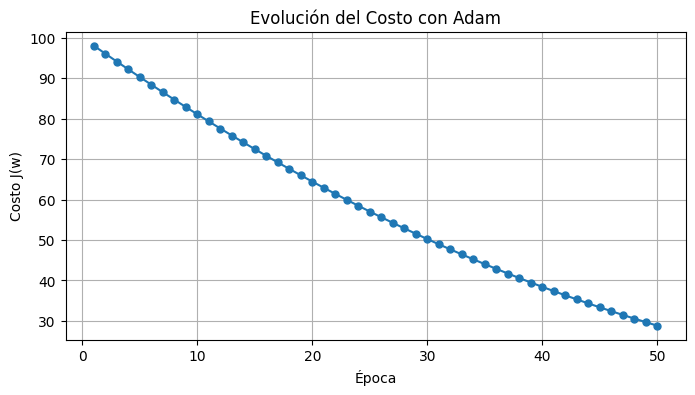

In [1]:
# Ejemplo en Python: Minimización de J(w) = w^2 utilizando Adam

import numpy as np
import matplotlib.pyplot as plt

# Definir la función de pérdida J(w) = w^2
def J(w):
    return w**2

# Definir la derivada de J(w)
def grad_J(w):
    return 2 * w

# Inicialización del parámetro y de los momentos
w = 10.0          # Valor inicial de w
eta = 0.1         # Tasa de aprendizaje
beta1 = 0.9       # Coeficiente para el primer momento
beta2 = 0.999     # Coeficiente para el segundo momento
epsilon = 1e-8    # Constante para evitar división por cero
epochs = 50       # Número de iteraciones

m = 0.0  # Inicialización del primer momento
v = 0.0  # Inicialización del segundo momento

w_history = []
loss_history = []

for t in range(1, epochs+1):
    grad = grad_J(w)
    
    # Actualización de los momentos
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * (grad ** 2)
    
    # Corrección de sesgo
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)
    
    # Actualización del parámetro
    w = w - eta * m_hat / (np.sqrt(v_hat) + epsilon)
    
    w_history.append(w)
    loss_history.append(J(w))
    print(f"Epoch {t:2d}: w = {w:.4f}, Loss = {J(w):.4f}")

plt.figure(figsize=(8, 4))
plt.plot(range(1, epochs+1), loss_history, marker='o', markersize=5)
plt.title("Evolución del Costo con Adam")
plt.xlabel("Época")
plt.ylabel("Costo J(w)")
plt.grid(True)
plt.show()


In [2]:
# Ejemplo interactivo utilizando ipywidgets para Adam

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

def run_adam(eta, beta1, beta2, epsilon, epochs, w_init):
    w = w_init
    m = 0.0
    v = 0.0
    w_history = []
    loss_history = []
    
    for t in range(1, epochs+1):
        grad = 2 * w  # Derivada de J(w) = w^2
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        w = w - eta * m_hat / (np.sqrt(v_hat) + epsilon)
        w_history.append(w)
        loss_history.append(w**2)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs+1), w_history, marker='o', color='blue')
    plt.title("Evolución de w con Adam")
    plt.xlabel("Época")
    plt.ylabel("w")
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs+1), loss_history, marker='o', color='red')
    plt.title("Evolución de J(w) con Adam")
    plt.xlabel("Época")
    plt.ylabel("J(w)")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

interact(run_adam,
         eta=FloatSlider(value=0.1, min=0.001, max=0.5, step=0.001, description='Learning Rate'),
         beta1=FloatSlider(value=0.9, min=0.0, max=0.99, step=0.01, description='Beta1'),
         beta2=FloatSlider(value=0.999, min=0.9, max=0.9999, step=0.0001, description='Beta2'),
         epsilon=FloatSlider(value=1e-8, min=1e-10, max=1e-6, step=1e-10, description='Epsilon', readout_format='.0e'),
         epochs=IntSlider(value=50, min=10, max=200, step=10, description='Epochs'),
         w_init=FloatSlider(value=10.0, min=-20.0, max=20.0, step=0.5, description='w Init'))


interactive(children=(FloatSlider(value=0.1, description='Learning Rate', max=0.5, min=0.001, step=0.001), Flo…

<function __main__.run_adam(eta, beta1, beta2, epsilon, epochs, w_init)>


::: tip Consejo
En esta sección se ha explicado el funcionamiento del perceptrón como el modelo lineal más básico, junto con su regla de actualización, la cual se inspira en el gradiente descendente. Se ha descrito el gradiente descendente como un método para minimizar funciones de pérdida mediante la actualización iterativa de los parámetros, y se ha mostrado un ejemplo sencillo con $J(w)=w^2$ para ilustrar este proceso.  

Asimismo, se han comentado las variantes del gradiente descendente (batch, estocástico y mini-batch) y se han introducido optimizadores avanzados como Momentum, RMSProp y Adam, que permiten mejorar la convergencia y el rendimiento del entrenamiento en problemas complejos.

Se recomienda experimentar con estos conceptos y variantes para comprender cómo afectan al proceso de optimización en modelos de aprendizaje automático.
:::
